In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn
import pandas as pd
from matplotlib import rc,rcParams
rc('text', usetex=True)
rcParams['figure.figsize'] = (12., 12.0)

Download Txt GRID DATA
http://services.swpc.noaa.gov/text/aurora-nowcast-map.txt

In [2]:
ls Data/

aurora-nowcast-map.txt  BIKF-NZAA.csv


In [3]:
aurora=np.loadtxt('Data/aurora-nowcast-map.txt')

In [7]:
flight=np.loadtxt('Data/BIKF-NZAA.csv',delimiter=',',dtype=str)
lat=flight[:,3].astype(float)
lon=flight[:,4].astype(float)

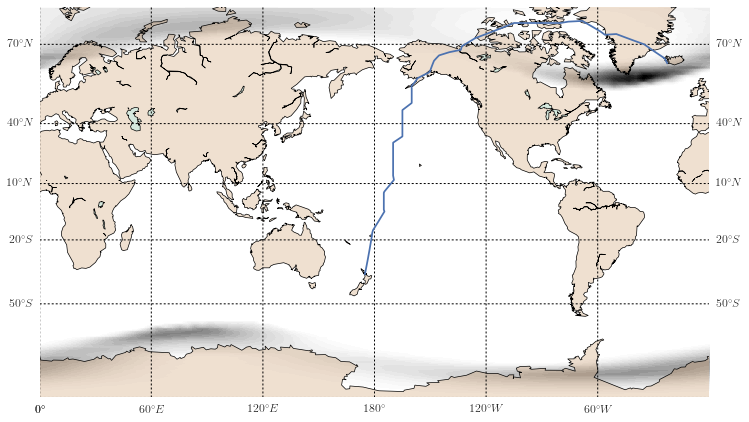

In [54]:
nlats = 512
nlons = 1024
lats=np.linspace(-90,90,nlats)
lons=np.linspace(0,360,nlons)
#m = Basemap(projection='ortho',lat_0=70,lon_0=-100,resolution='l')
m=Basemap(llcrnrlon=0,llcrnrlat=-80,urcrnrlon=360,urcrnrlat=80,projection='mill')
m.drawcoastlines(linewidth=0.7)
m.fillcontinents(color='#cc9966',lake_color='#99ffff',alpha=0.3)
m.drawparallels(np.arange(-80,81,30),labels=[1,1,0,0])
m.drawmeridians(np.arange(0,360,60),labels=[0,0,0,1])
#m.contourf(lats,lons,aurora)
m.imshow(aurora[::-1])
m.plot(lon,lat,latlon=True)

In [55]:
from scipy.interpolate import griddata,interp2d,RectBivariateSpline,RegularGridInterpolator,bisplrep,Rbf
f = interp2d(lons,lats, aurora[::-1])

In [56]:
prob= [f(lon[i],lat[i]) for i in range(lon.shape[0])]

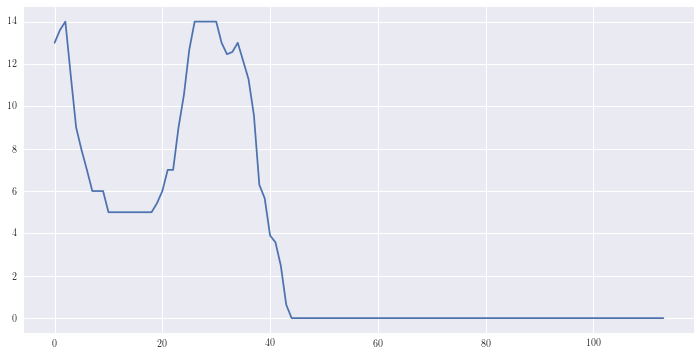

In [57]:
fig,ax=plt.subplots(figsize=(12,6))
ax.plot(prob)